### Read the data set

In [113]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from frozenlist import FrozenList


In [114]:
#read the data set

df = pd.read_csv('Dataset/Airbnb_Data.csv')

#display the shape of the data set
print(df.shape)

#display the columns of the data set
print(df.columns)

#display the data types of the columns
print(df.dtypes)

(74111, 29)
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       ob

In [115]:
#display the info of the data set
print(df.info())

#display the summary statistics of the data set
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [116]:
# for each row, we need to put the ammenities in a list format
df['amenities'] = df['amenities'].apply(lambda x: x.replace('{','').replace('}','').replace('"','').split(','))

#display the first 5 rows of the data set
print(df.head())

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  [Wireless Internet, Air conditioning, Kitchen,...             3        1.0   
1  [Wireless Internet, Air conditioning, Kitchen,...             7        1.0   
2  [TV, Cable TV, Wireless Internet, Air conditio...             5        1.0   
3  [TV, Cable TV, Internet, Wireless Internet, Ki...             4        1.0   
4  [TV, Internet, Wireless Internet, Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [117]:
#replace the log price column with the price column

df['log_price'] = df['log_price'].apply(lambda x: np.exp(x))

#rename the log price column to price

df.rename(columns={'log_price':'price'}, inplace=True)

#export the data set to a new csv file

df.to_csv('Dataset/Airbnb_Data1.csv', index=False)

#the newdf is used (after the markdown preprocess) for removing rows with prices greater than 500 ********
newdf=df.copy()

In [118]:
#get some statistics of the price column
print(df['price'].describe())

count    74111.000000
mean       160.370849
std        168.580415
min          1.000000
25%         75.000000
50%        111.000000
75%        185.000000
max       1999.000000
Name: price, dtype: float64


Unique amenities 

In [119]:
# get a set of all unique amenities
amenities = set()
for index, row in df.iterrows():
    for amenity in row['amenities']:
        amenities.add(amenity)


amenities.remove('')
print(len(amenities), 'amenities length')
#display the unique amenities
print(amenities)


130 amenities length
{'Private entrance', 'Fixed grab bars for shower & toilet', 'Beach essentials', 'Free parking on street', 'TV', 'Smoking allowed', 'First aid kit', 'Game console', 'Private bathroom', 'Lock on bedroom door', 'Pack ’n Play/travel crib', 'Internet', 'Wide clearance to shower and toilet', 'Refrigerator', 'Long term stays allowed', 'Changing table', 'BBQ grill', 'Well-lit path to entrance', 'Dryer', 'Disabled parking spot', 'Bath towel', 'Carbon monoxide detector', 'Shampoo', 'Firm matress', 'Hot water kettle', 'Private living room', '24-hour check-in', 'Handheld shower head', 'Iron', 'Table corner guards', 'Safety card', 'Microwave', 'Wireless Internet', 'Dog(s)', 'Other pet(s)', 'Garden or backyard', 'Ski in/Ski out', 'Wide clearance to bed', 'Elevator', 'Doorman Entry', 'Pets allowed', 'Pocket wifi', 'Cat(s)', 'Toilet paper', 'Wide entryway', 'Extra pillows and blankets', 'Essentials', 'Elevator in building', 'Smartlock', 'Bathtub with shower chair', 'Smoke detector

# Distribution of Airbnbs per city

In [120]:
# get unique cities
unique_city = set()
for index, row in df.iterrows():
    unique_city.add(row['city'])
print("Unique cities in the data set: ")
print(unique_city)

Unique cities in the data set: 
{'SF', 'NYC', 'DC', 'LA', 'Boston', 'Chicago'}


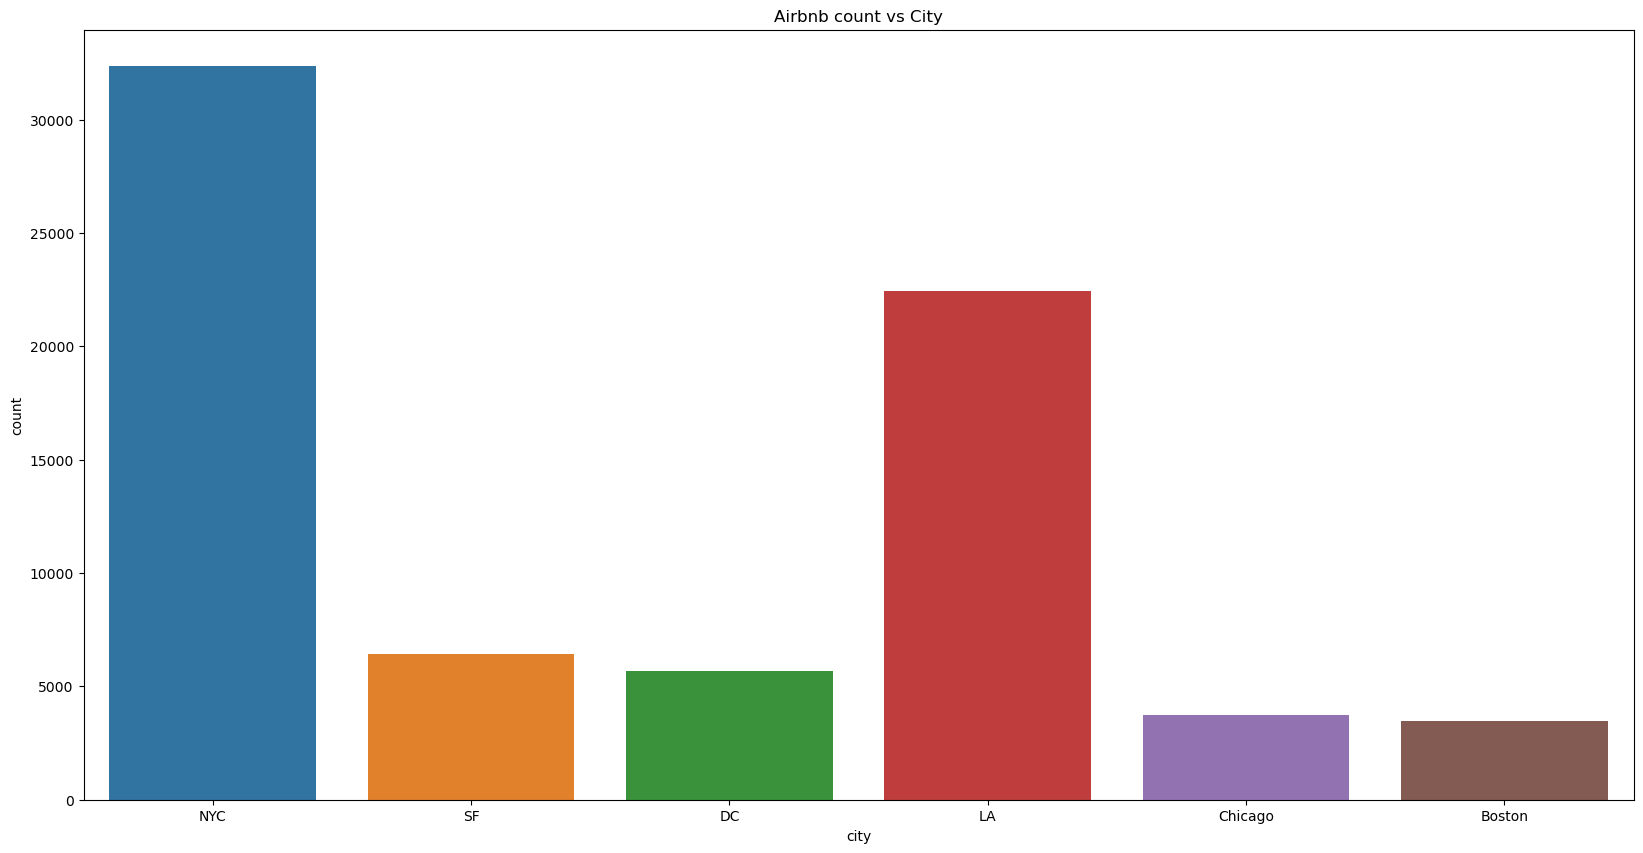

In [121]:
# Count of Airbnb listings in each city
plt.figure(figsize=(20,10))
sns.countplot(x='city', data=df)
plt.title('Airbnb count vs City')
plt.show()

# Price Distribution (before preprocessing)

Categorize prices 

In [122]:
#get unique intger value of the prices in the data set

prices = set()
for index, row in df.iterrows():
    prices.add(int(row['price']))

#display the unique prices
# 6901257  150.0     Apartment  Entire home/apt   
# 1   6304928  169.0     Apartment  Entire home/apt   
# 2   7919400  145.0     Apartment  Entire home/apt   
# 3  13418779  750.0         House  Entire home/apt   
# 4   3808709  115.0     Apartment  Entire home/apt 


In [123]:
#we have 640 unique prices, with minimum price of 1 USD and maximum price of 2000USD
#we can categorize the prices into 13 categories
#0-50, 51-100, 101-150, 151-200, 201-250, 251-300, 301-350, 351-400, 401-450, 451-500, 501-550, 551-600, 601-650
#650-700, 701-750, 751-800, 801-850, 851-900, 901-950, 951-1000, 1001-1050, 1051-1100, 1101-1150, 1151-1200, 1201-1250
#1251-1300, 1301-1350, 1351-1400, 1401-1450, 1451-1500, 1501-1550, 1551-1600, 1601-1650, 1651-1700, 1701-1750, 1751-1800
#1801-1850, 1851-1900, 1901-1950, 1951-2000

stringo = '''0-50, 51-100, 101-150, 151-200, 201-250, 251-300, 301-350, 351-400, 401-450, 451-500, 501-550, 551-600, 601-650, 650-700, 701-750, 751-800, 801-850, 851-900, 901-950, 951-1000, 1001-1050, 1051-1100, 1101-1150, 1151-1200, 1201-1250, 1251-1300, 1301-1350, 1351-1400, 1401-1450, 1451-1500, 1501-1550, 1551-1600, 1601-1650, 1651-1700, 1701-1750, 1751-1800, 1801-1850, 1851-1900, 1901-1950, 1951-2000'''
prices = stringo.split(',')

In [124]:
#change the prices to integers where the first value is the lower bound and the second value is the upper bound of the 40 categories
prices = [(int(price.split('-')[0]), int(price.split('-')[1])) for price in prices]

In [125]:
#add a new column to the data set called price_category
#the price category will be the category of the price of the listing
df['price_category'] = df['price'].apply(lambda x: [i for i in range(len(prices)) if prices[i][0] <= int(x) <= prices[i][1]][0])

Price Distribution 

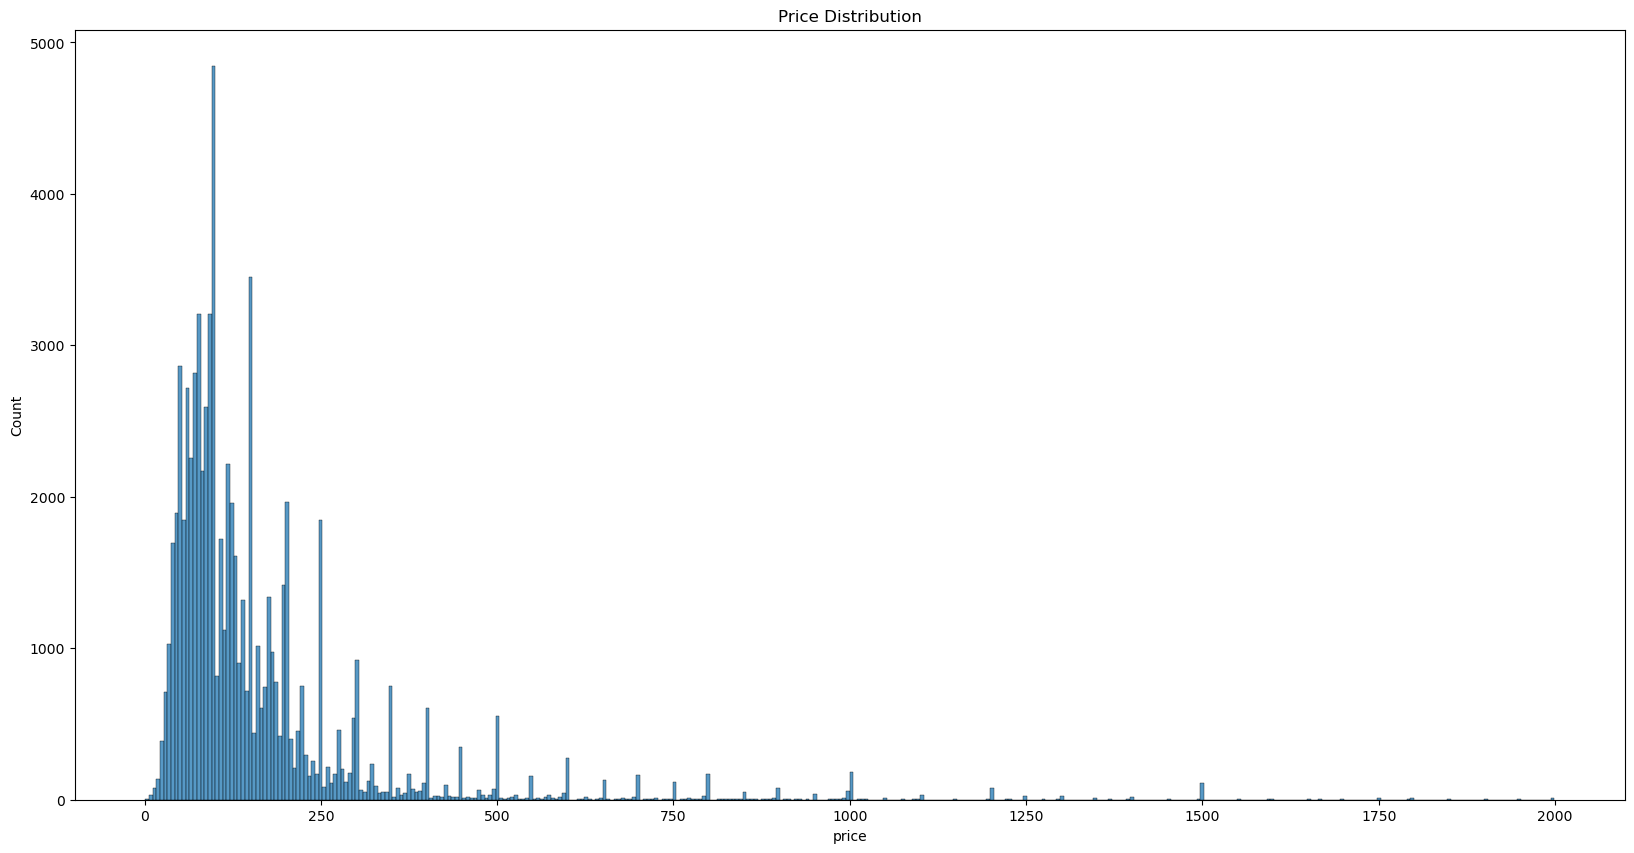

In [126]:
#plot prices 
plt.figure(figsize=(20,10))
sns.histplot(df['price'])
plt.title('Price Distribution')
plt.show()

Price categories distribution

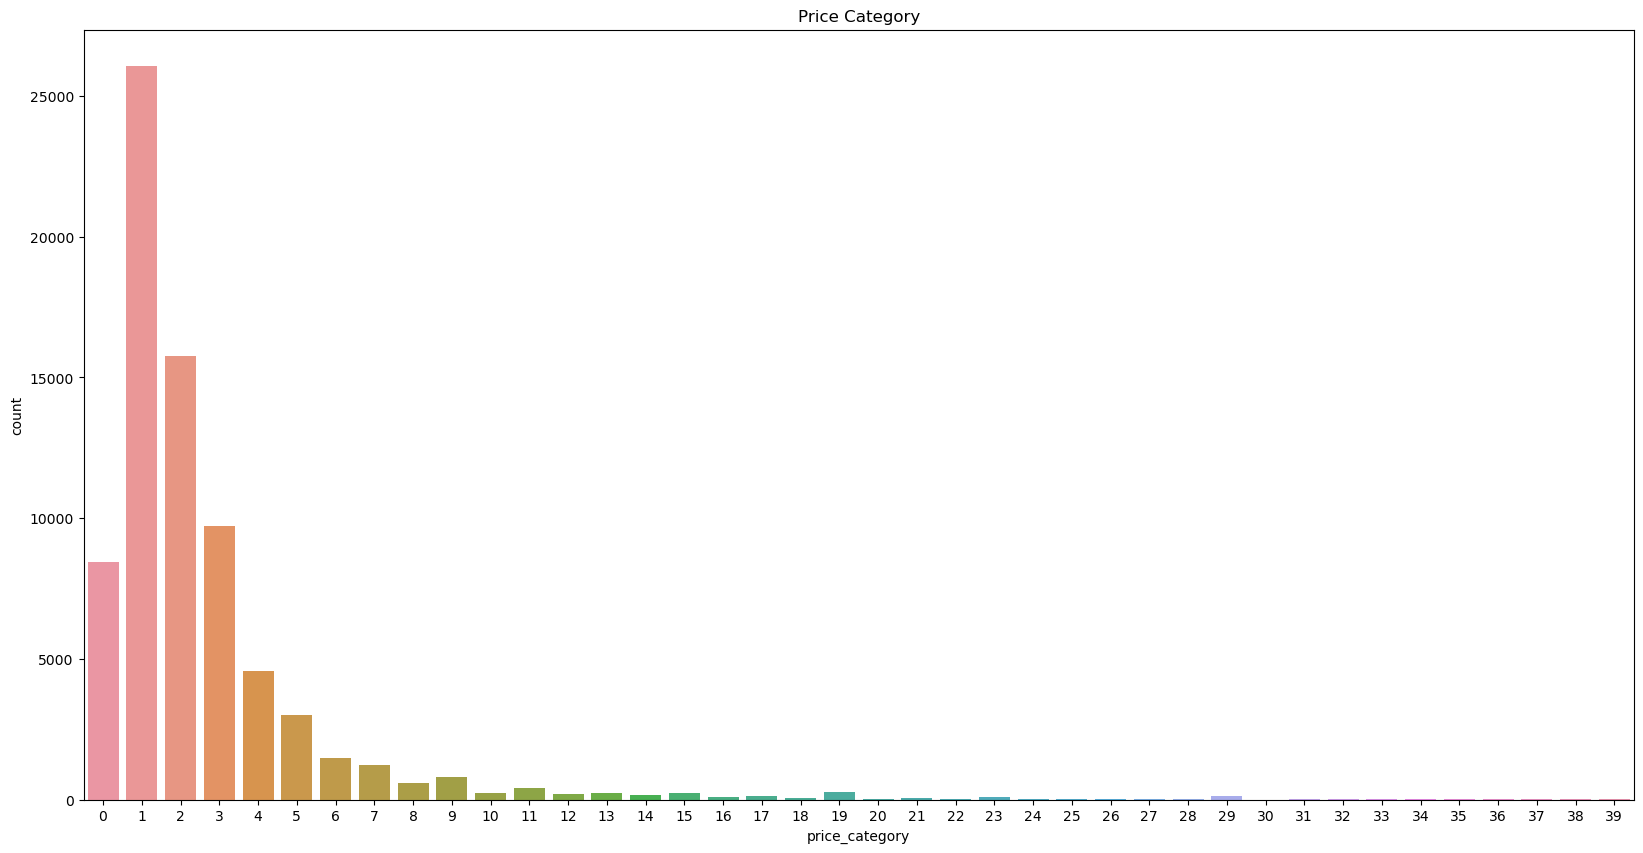

In [127]:
# after categorizing the prices into 40 categories, we can plot the price categories
plt.figure(figsize=(20,10))
sns.countplot(x=df['price_category'])
plt.title('Price Category')
plt.show()

Boxplot for prices

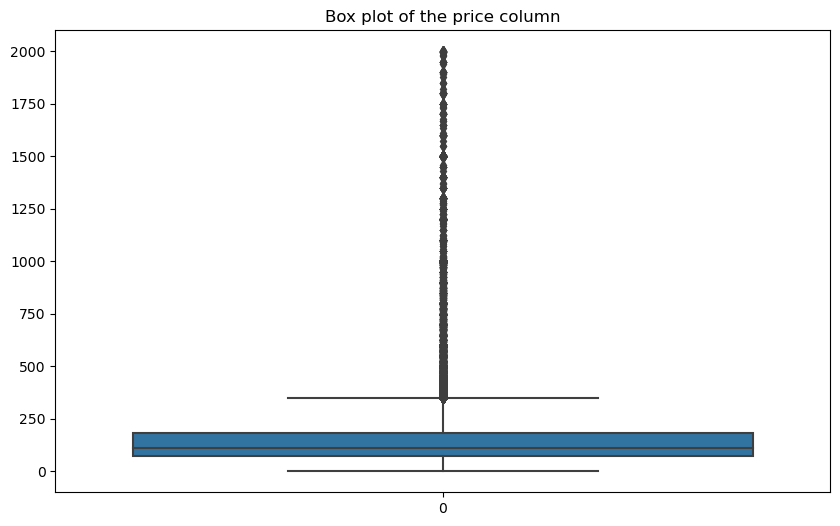

In [128]:
# box plot of the price column
plt.figure(figsize=(10,6))
sns.boxplot(df['price'])
plt.title('Box plot of the price column')
plt.show()
# from the following plot we could conclude that the price column has many outliers 
# we can remove the outliers by removing the rows with prices greater than 500

# Bed type distribution

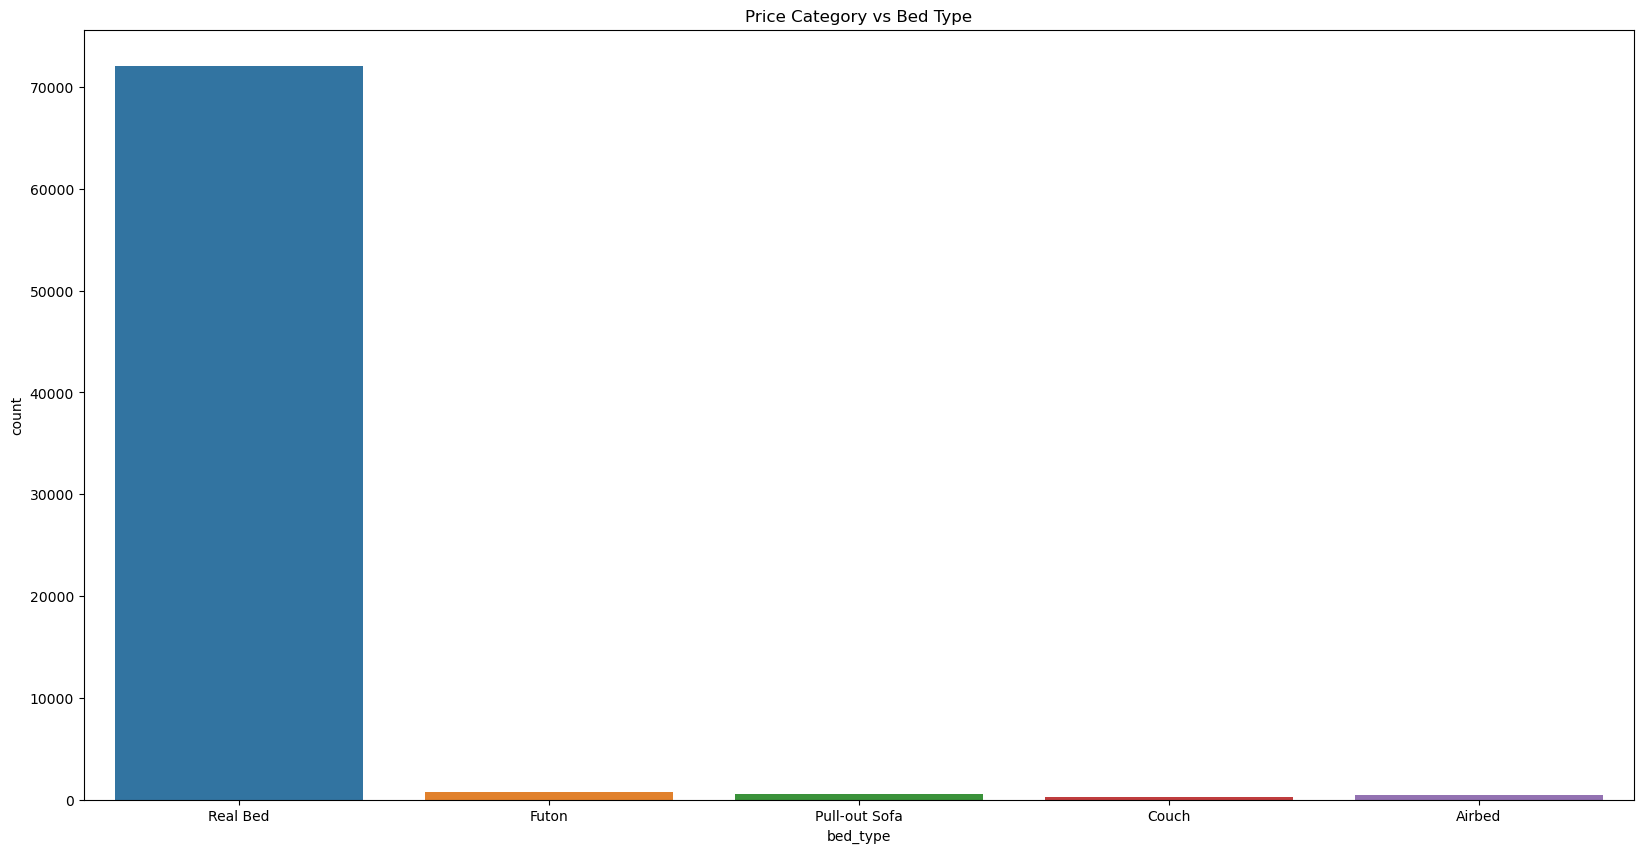

In [129]:
#plot the price category against the bed type
plt.figure(figsize=(20,10))
sns.countplot(x='bed_type', data=df)
plt.title('Price Category vs Bed Type')
plt.show()
# From the following plot, we conclude that bed type column is not useful for the analysis

# Airbnb count vs Accomodates

In [130]:
#get the unique accomodates values
accomodates = set()
for index, row in df.iterrows():
    accomodates.add(row['accommodates'])
print(accomodates)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


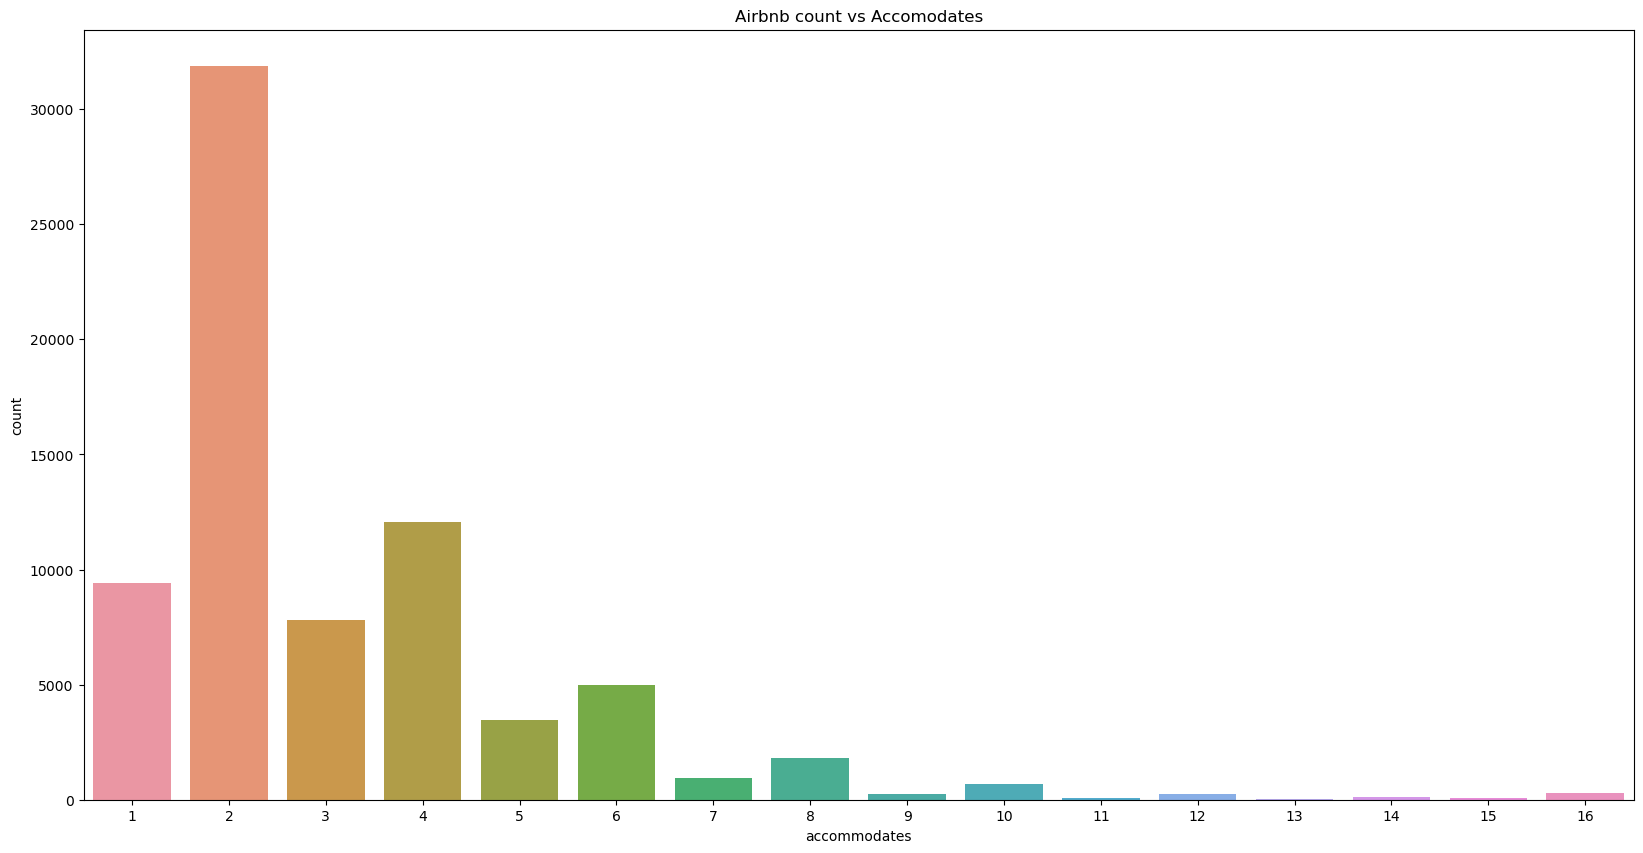

In [131]:
#plot the price category against the accomodates
plt.figure(figsize=(20,10))
sns.countplot(x='accommodates', data=df)
plt.title('Airbnb count vs Accomodates')
plt.show()

# Preprocessing

In [132]:
#preprocess
#drop the following columns
newdf.drop('host_has_profile_pic', axis=1, inplace=True)
newdf.drop('bed_type', axis=1, inplace=True)
newdf.drop('zipcode', axis=1, inplace=True)

In [133]:
newdf = newdf[newdf['price'] <= 500]

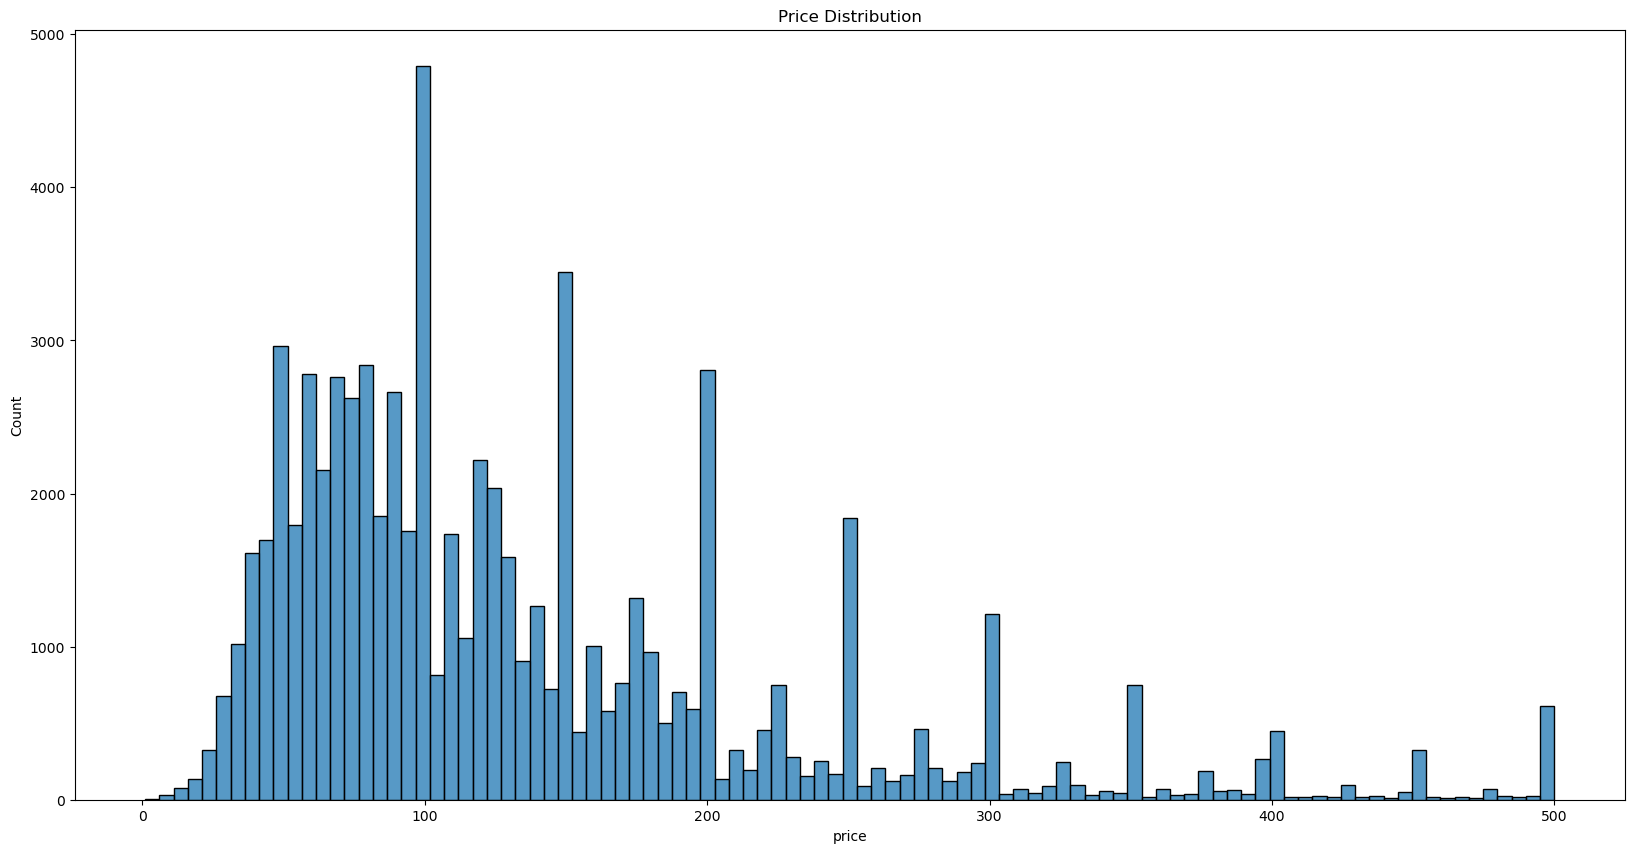

In [134]:
#plot prices 
plt.figure(figsize=(20,10))
sns.histplot(newdf['price'])
plt.title('Price Distribution')
plt.show()

# Create new price categories

In [135]:
# Assign a price category to each price
newdf['price_category'] = pd.cut(newdf['price'], bins=50, labels=range(1, 51))
#0-10 usd , 11-20 usd , ...

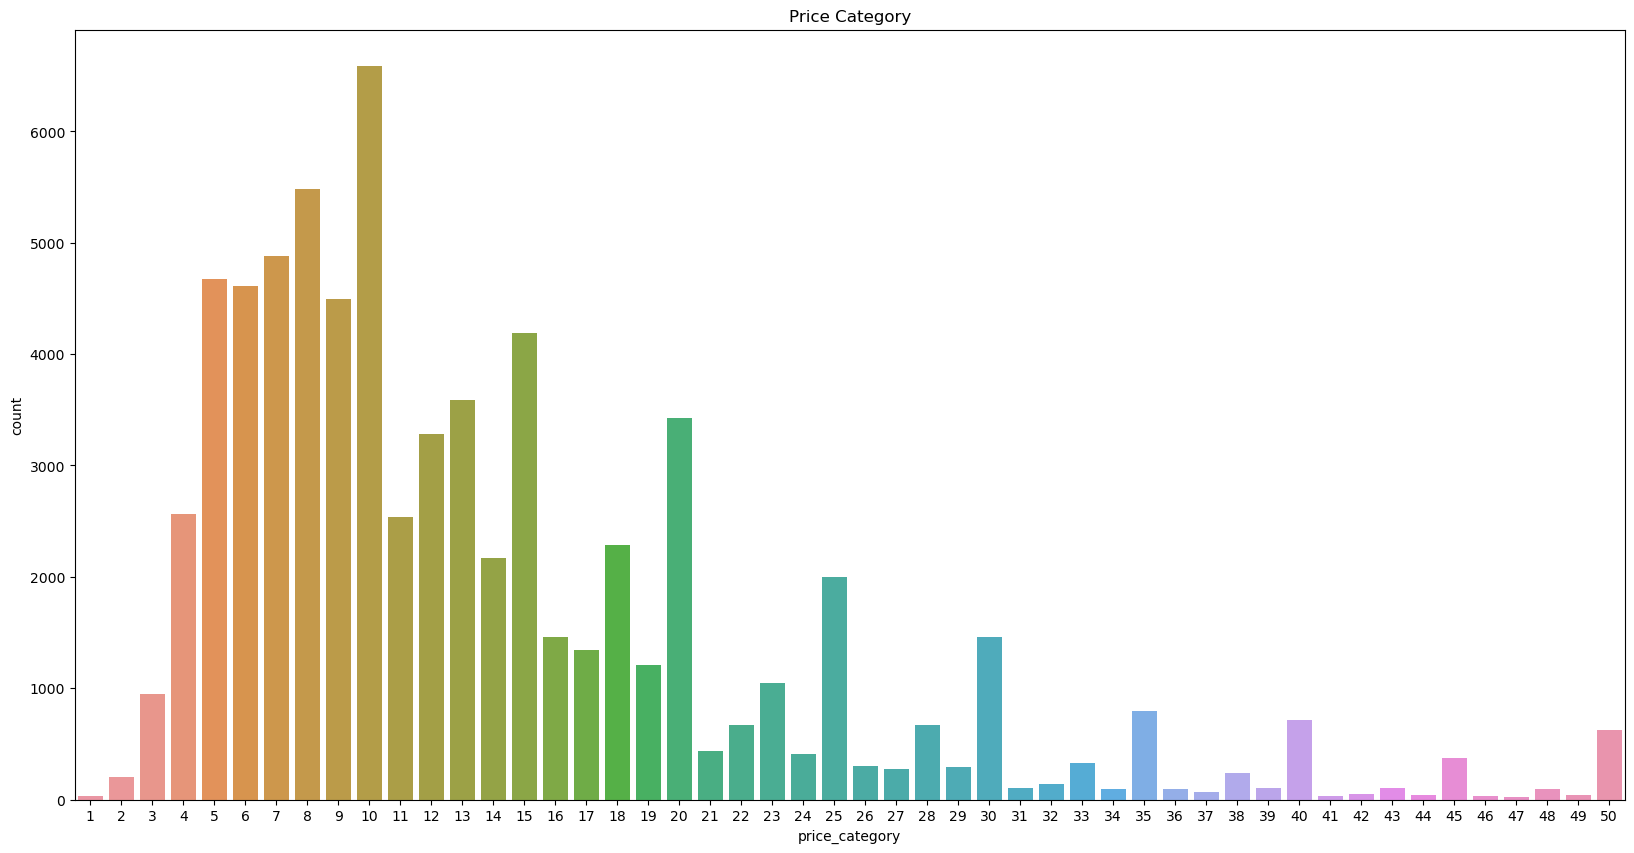

In [136]:
#plot the price category 
plt.figure(figsize=(20,10))
sns.countplot(x='price_category', data=newdf)
plt.title('Price Category')
plt.show()

# Price and room type relations

C:\Users\DELL\AppData\Local\Temp\ipykernel_11596\2158229671.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(x='room_type', hue=newdf['price_category'], data=newdf[df['room_type'] == room_type])


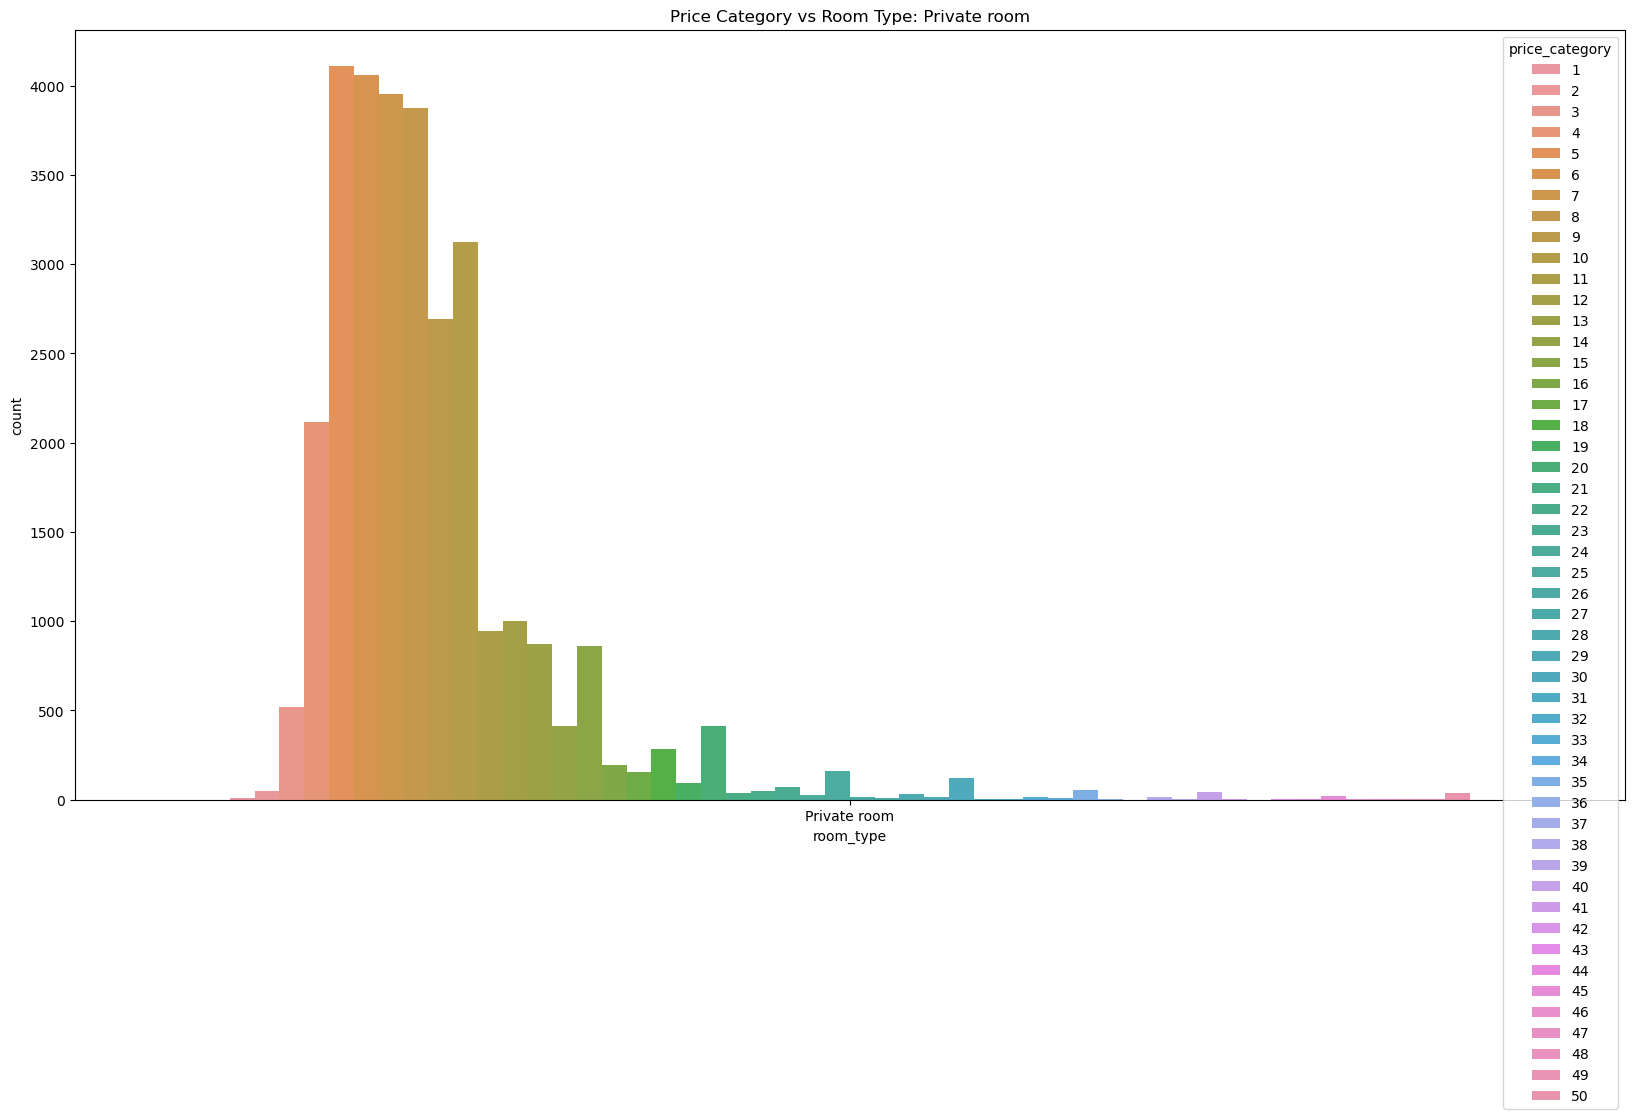

C:\Users\DELL\AppData\Local\Temp\ipykernel_11596\2158229671.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(x='room_type', hue=newdf['price_category'], data=newdf[df['room_type'] == room_type])


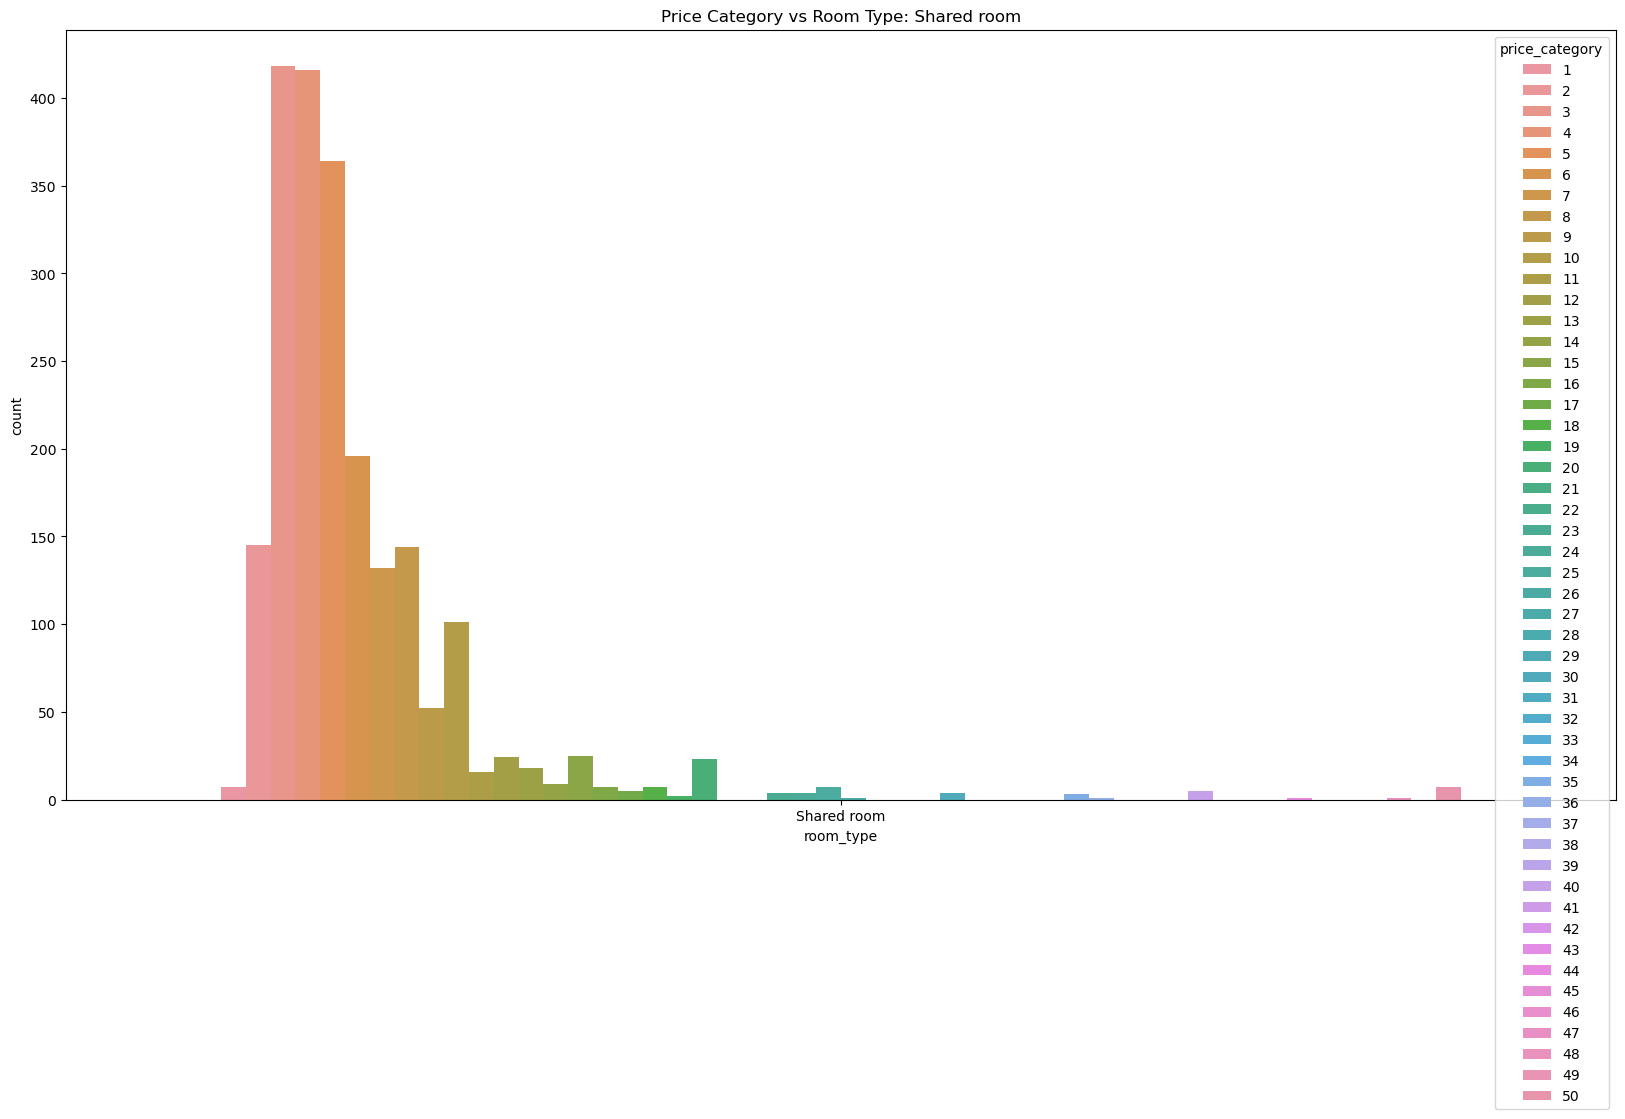

C:\Users\DELL\AppData\Local\Temp\ipykernel_11596\2158229671.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(x='room_type', hue=newdf['price_category'], data=newdf[df['room_type'] == room_type])


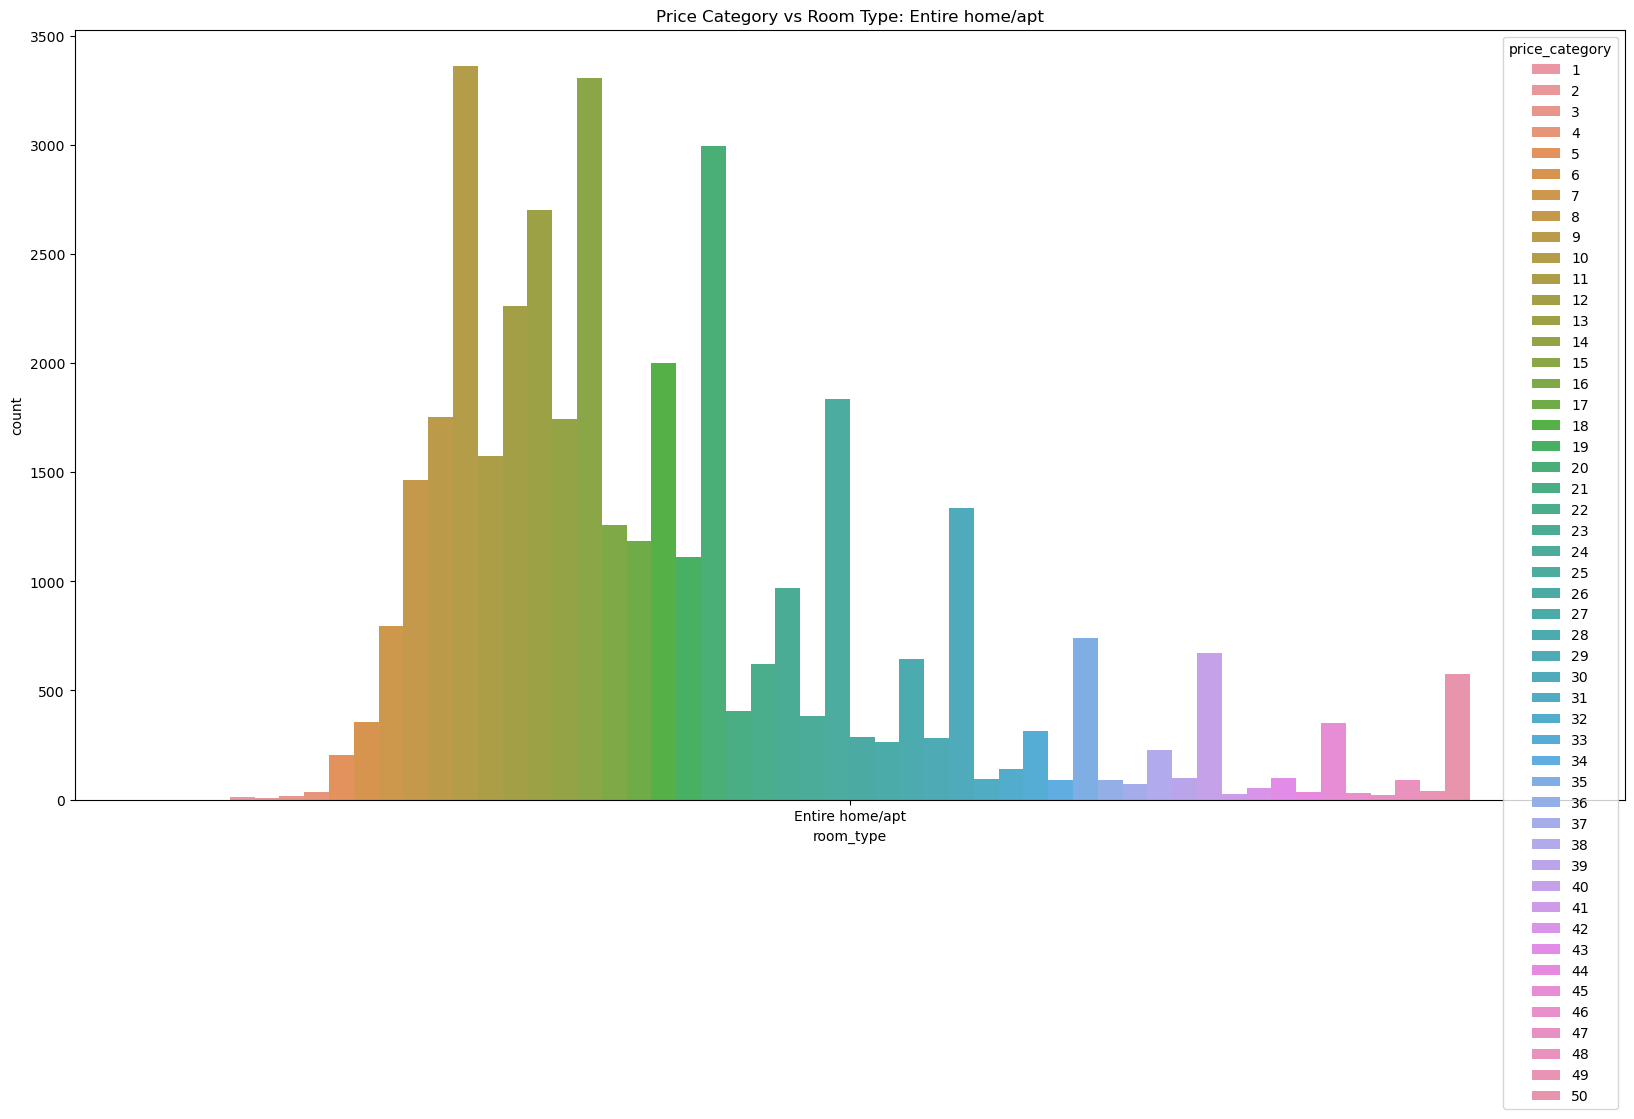

In [137]:
# for each room type we can see the distribution of the price categories
for room_type in set(df['room_type']):
    plt.figure(figsize=(20,10))
    sns.countplot(x='room_type', hue=newdf['price_category'], data=newdf[df['room_type'] == room_type])
    plt.title('Price Category vs Room Type: ' + room_type)
    plt.show()

# Property type and price relations

In [138]:
# plot the price category against the room type
# for each room type we can see the distribution of the price categories


# City and price relations

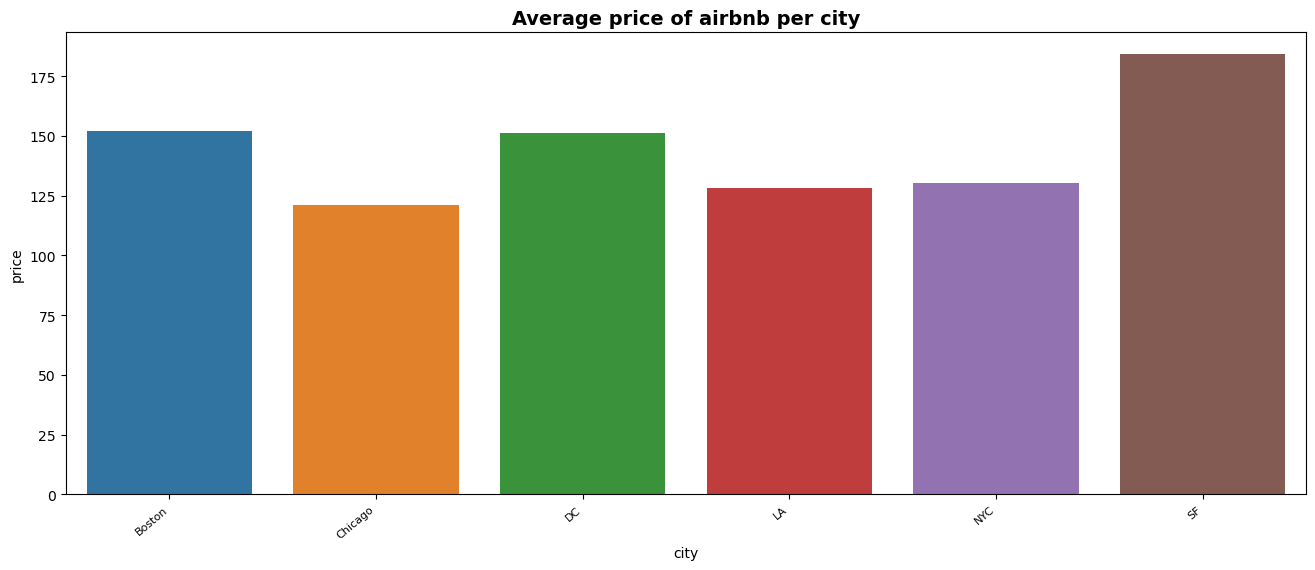

In [139]:
#avg price of each city
df_avg_price = newdf.groupby('city')['price'].mean().reset_index()
#plot
plt.figure(figsize=(16,6))
ax = sns.barplot(x='city', y='price', data=df_avg_price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Average price of airbnb per city', fontsize=14, fontweight='bold')
plt.show()

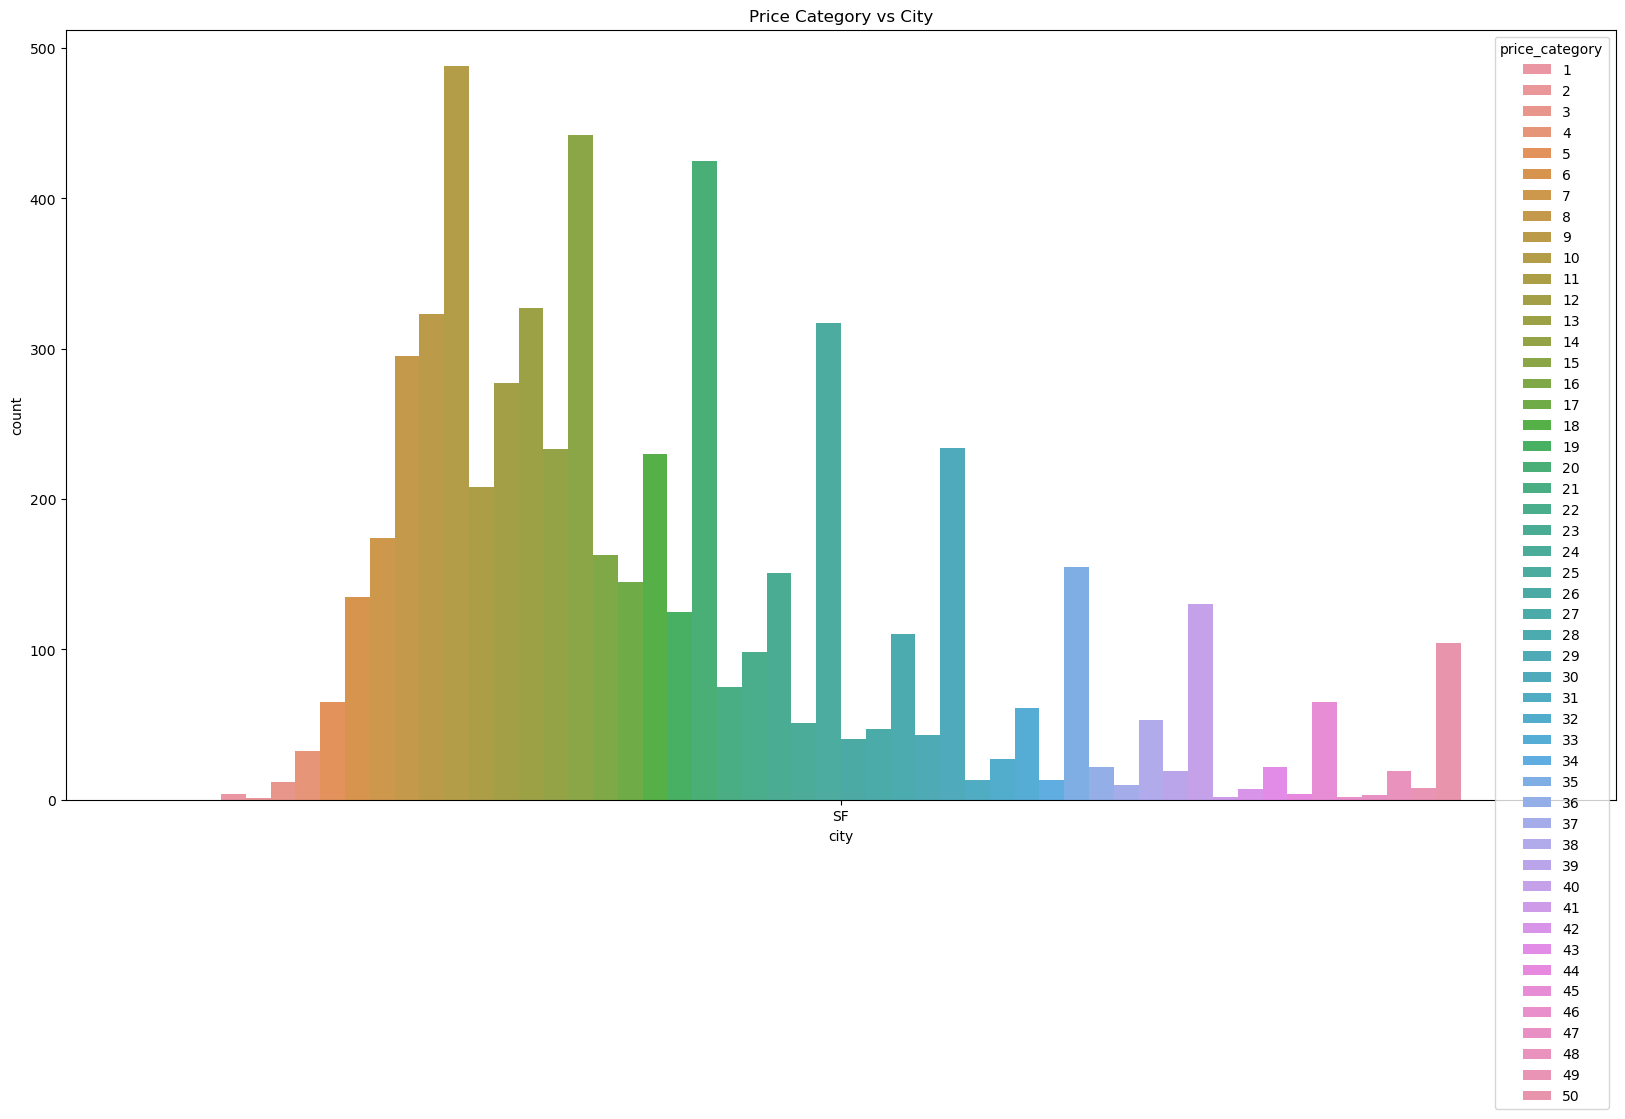

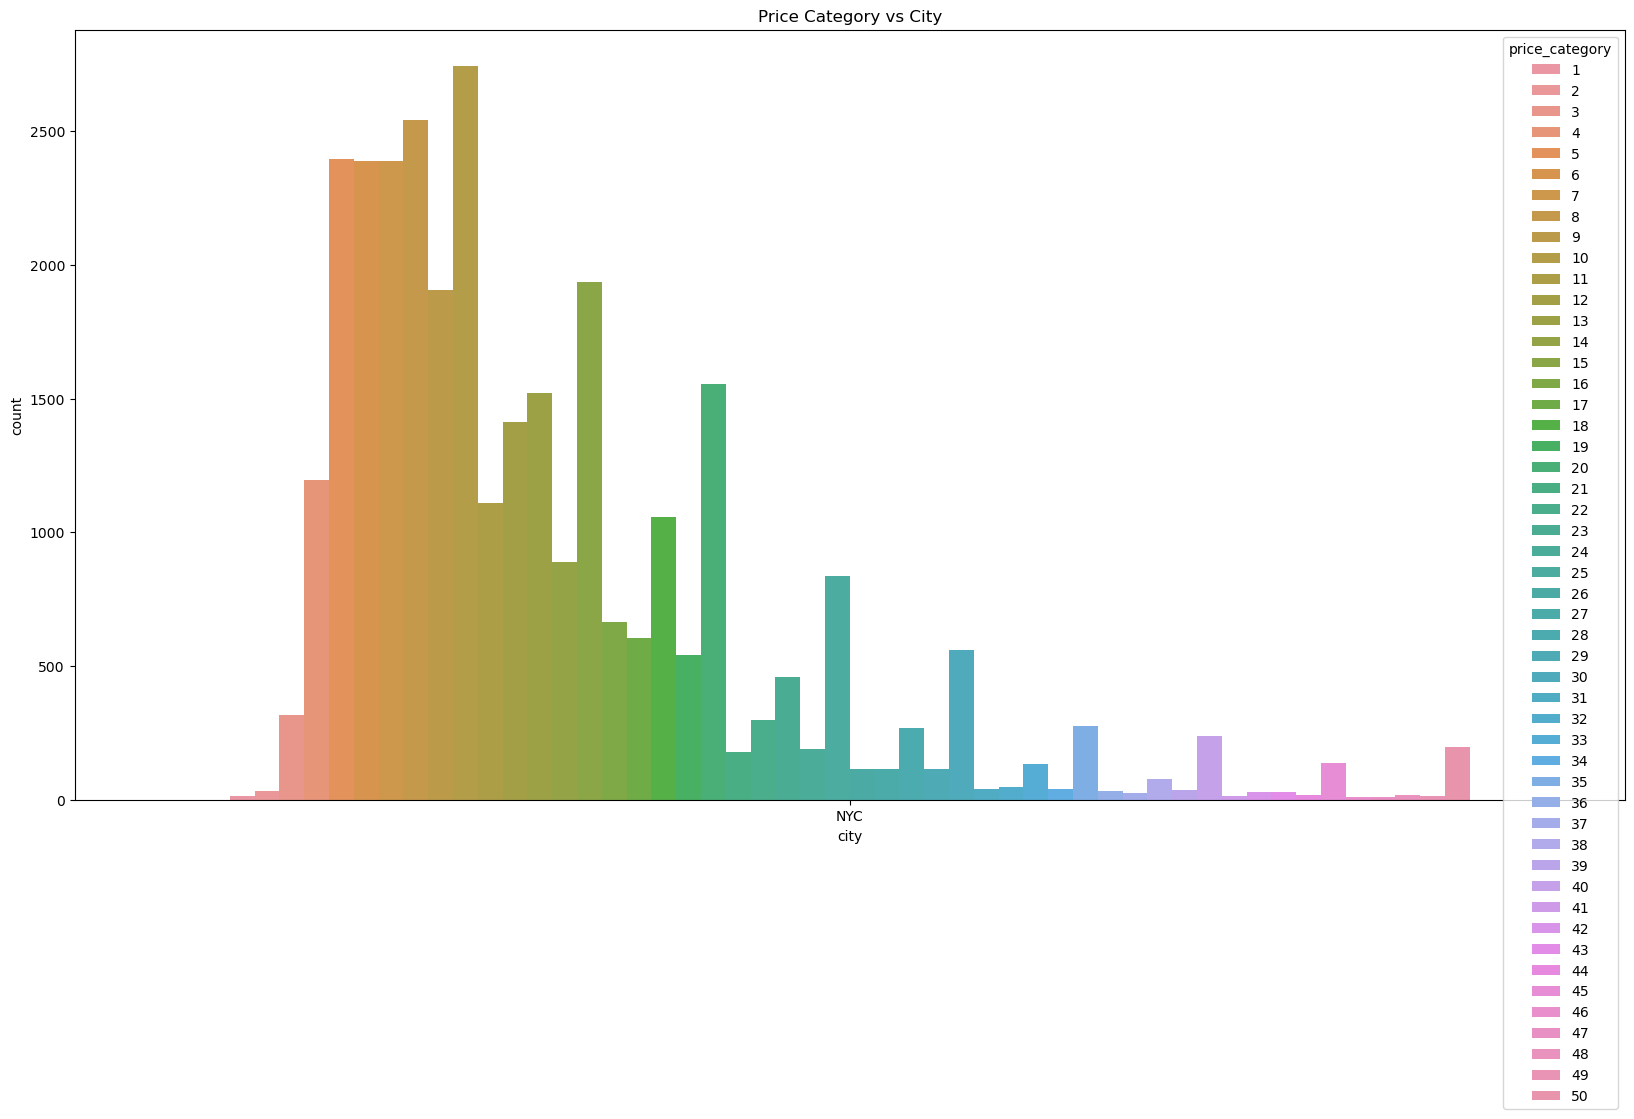

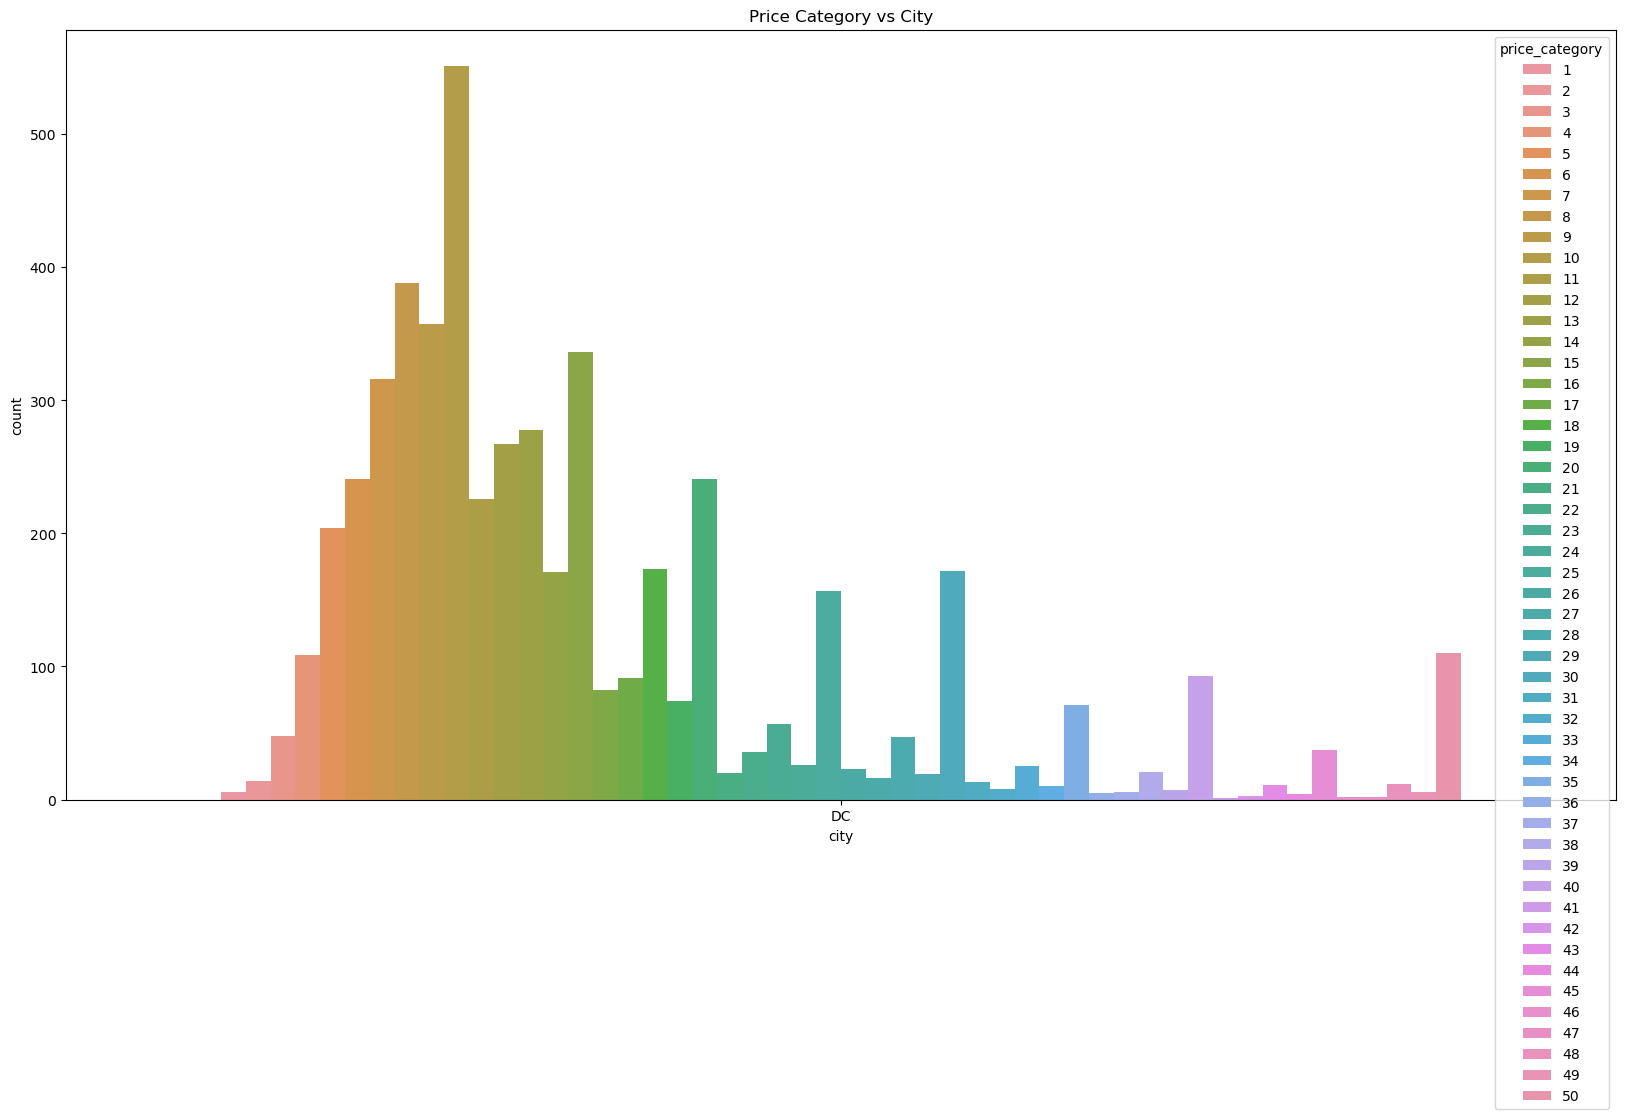

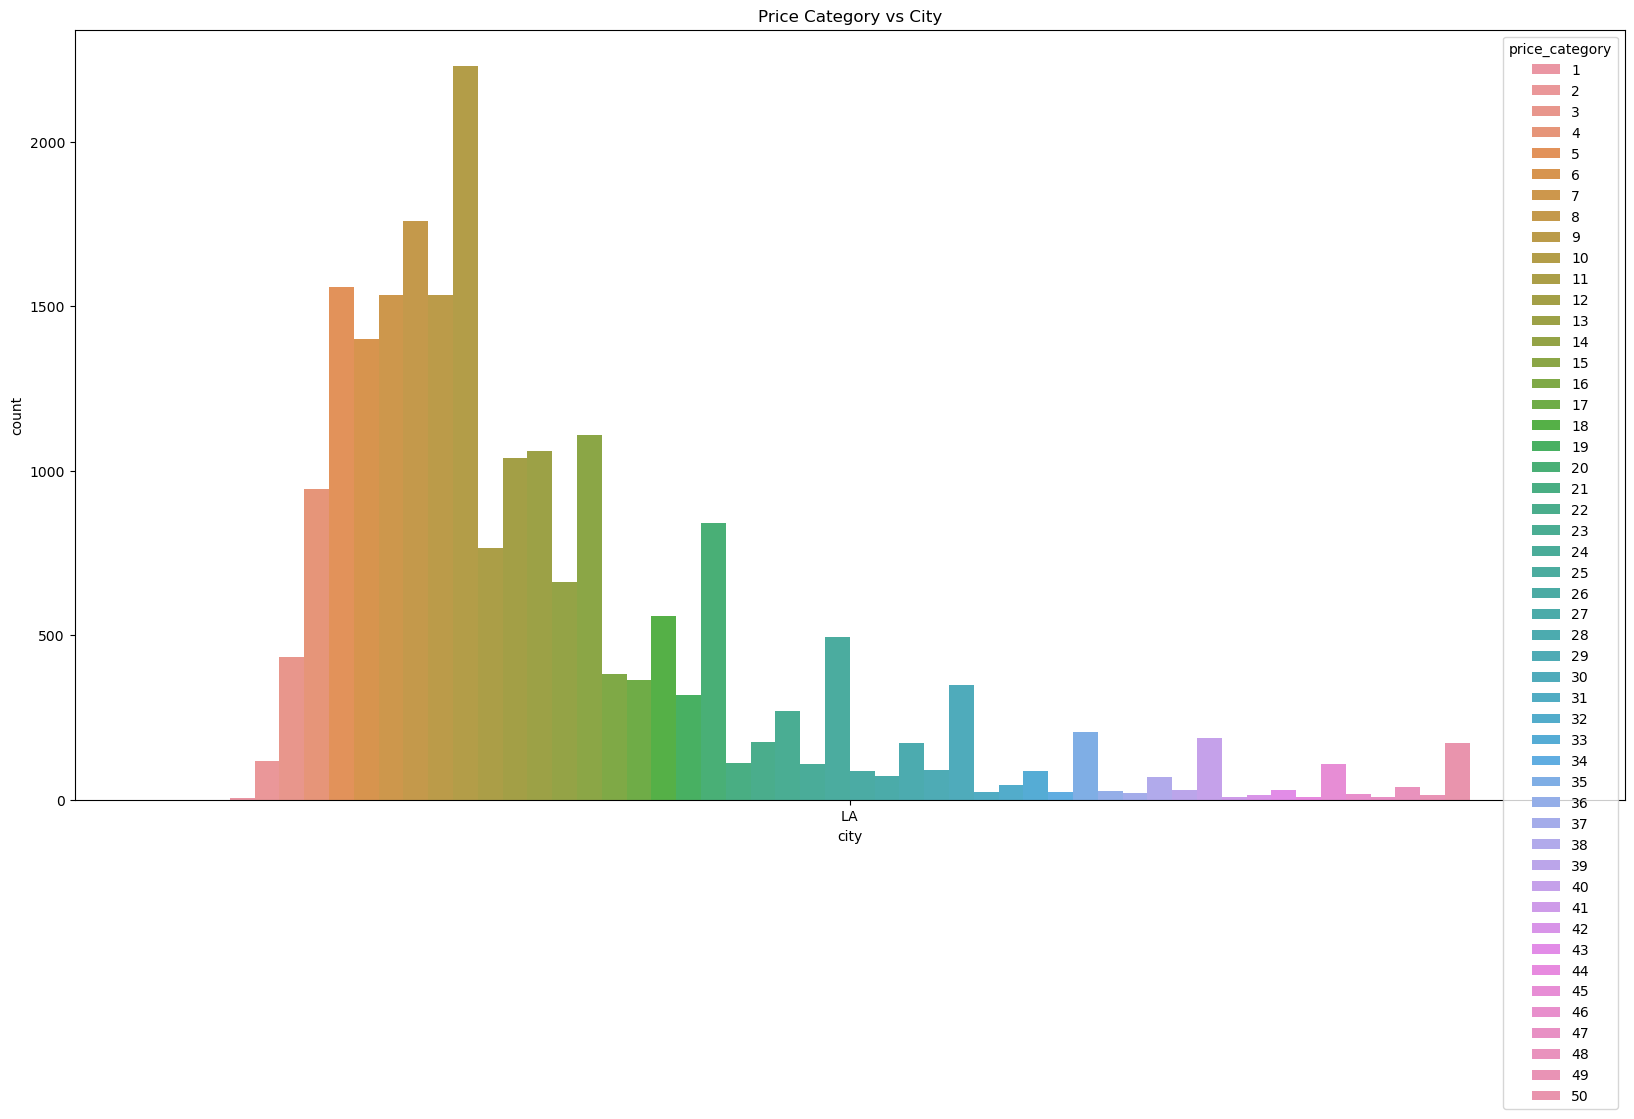

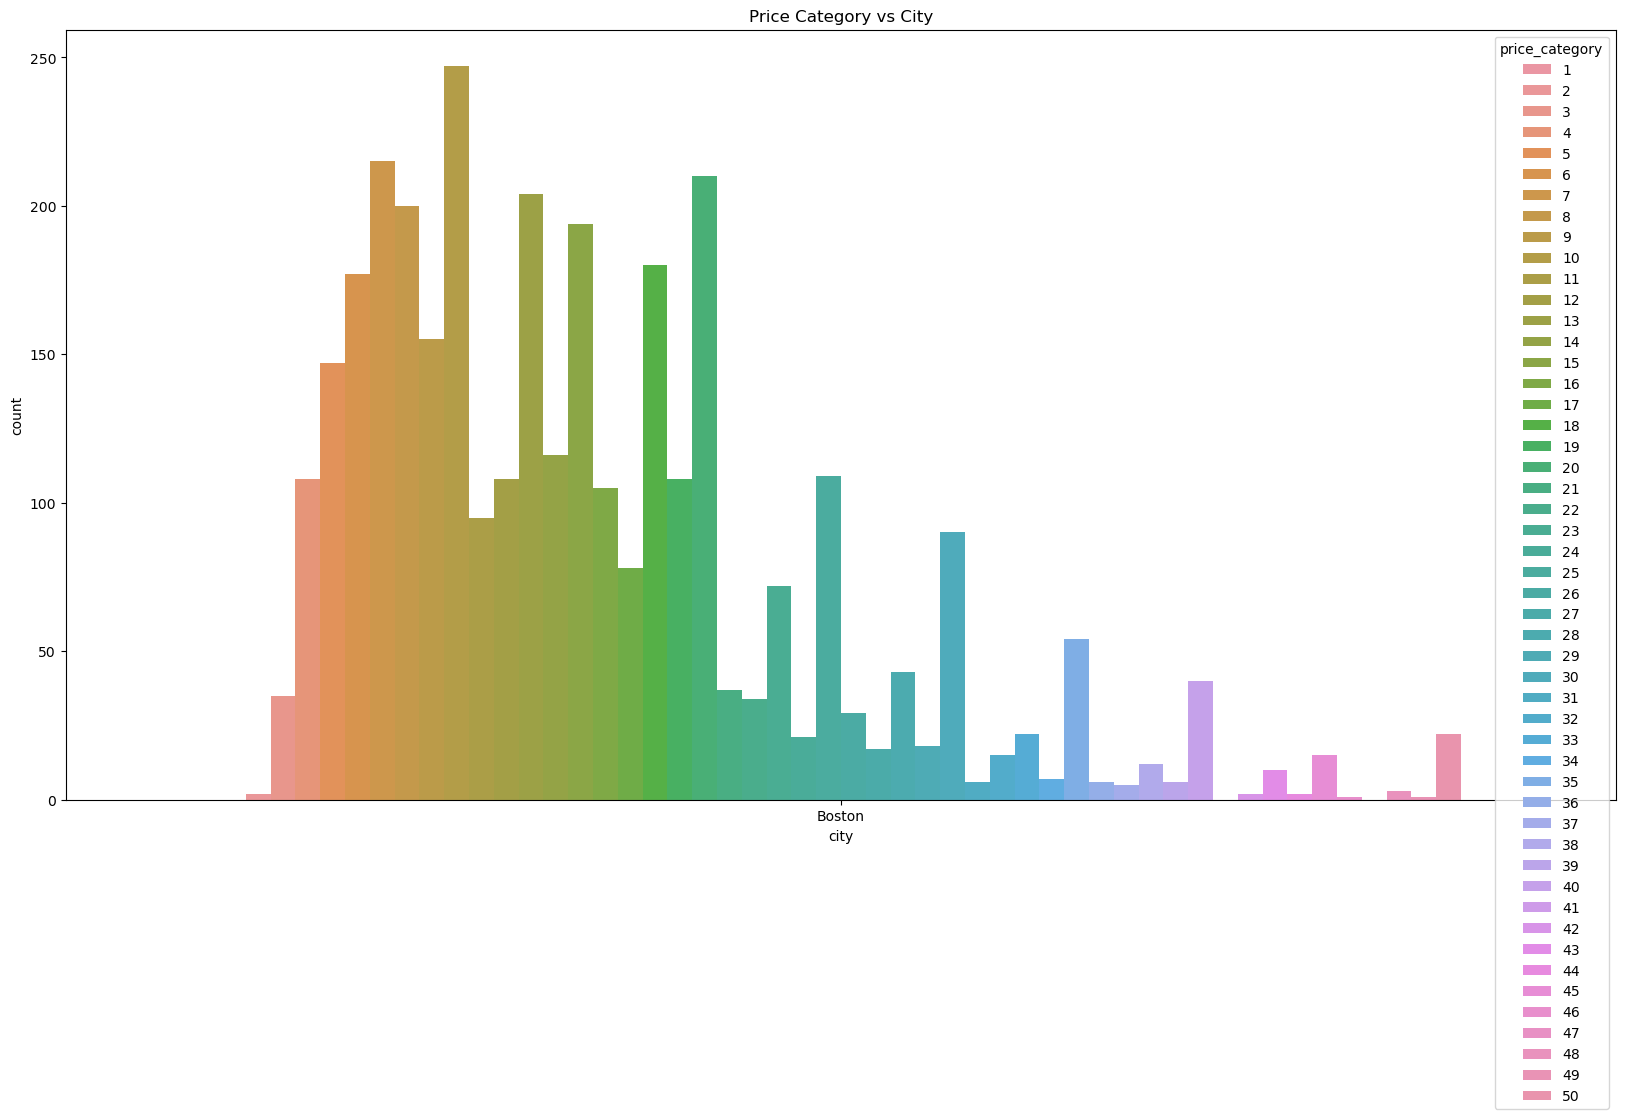

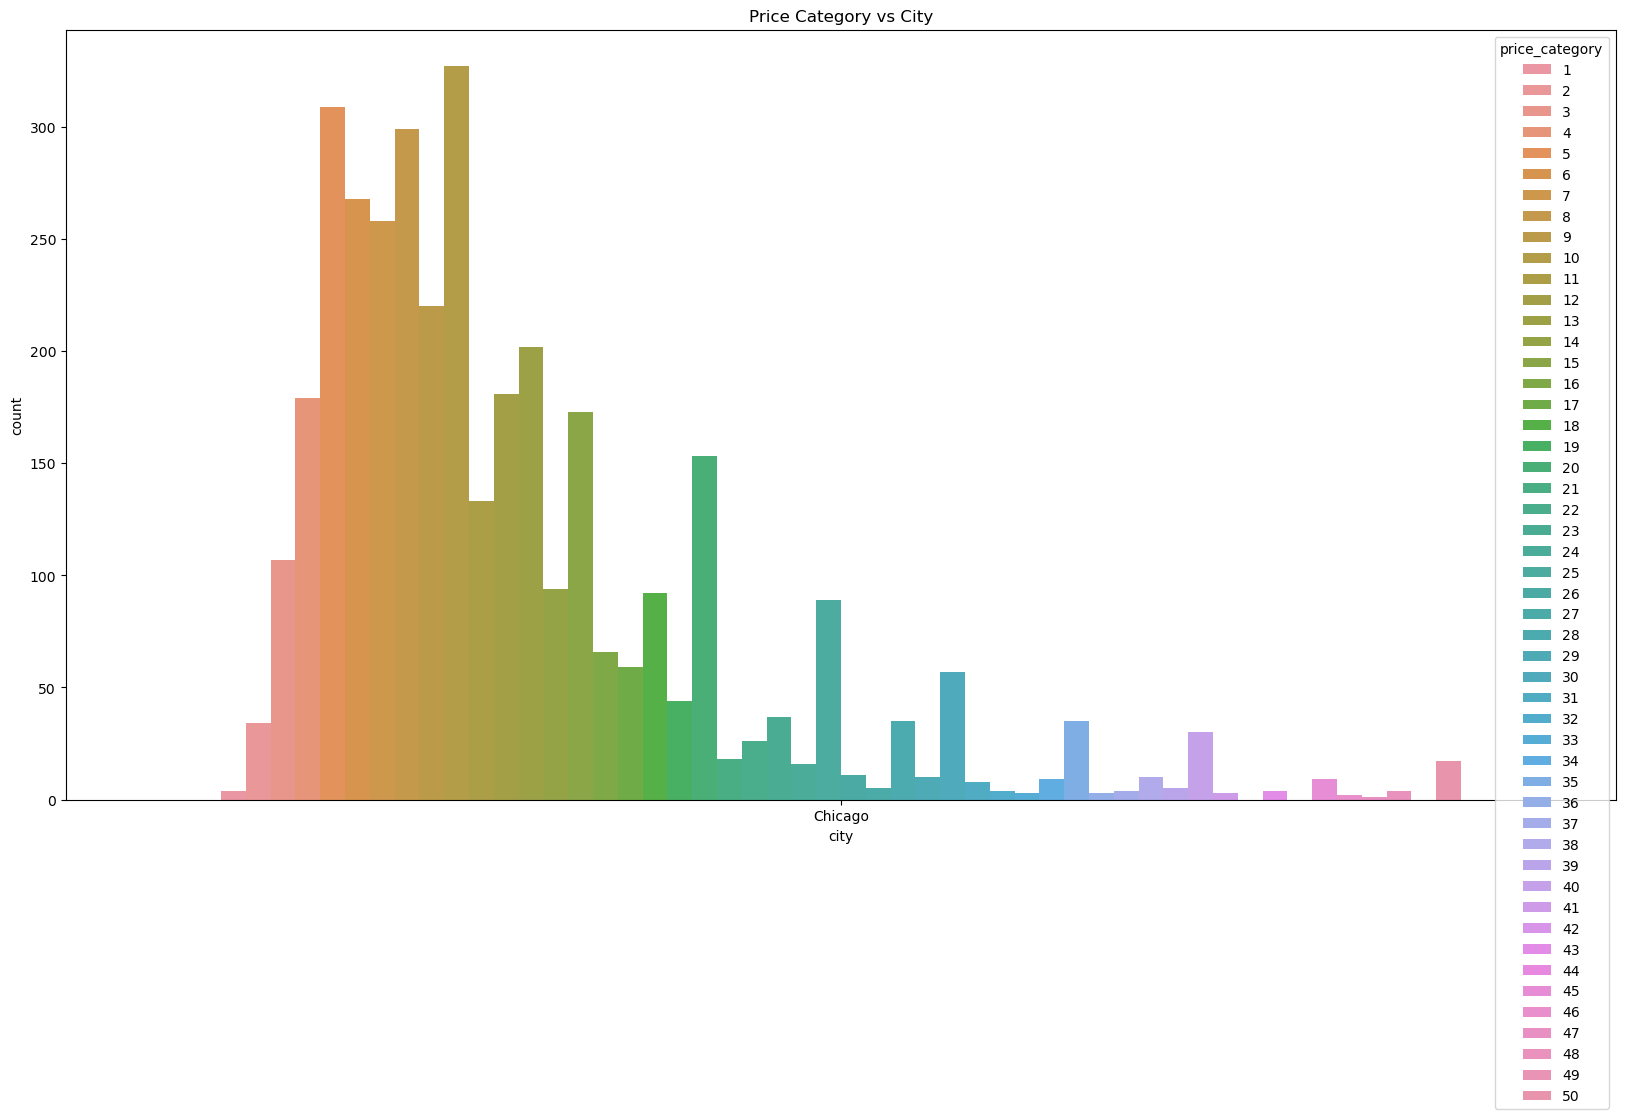

In [140]:
#for each city we can see the distribution of the price categories
for city in unique_city:
    plt.figure(figsize=(20,10))
    sns.countplot(x='city', hue=newdf['price_category'], data=newdf[newdf['city'] == city])
    plt.title('Price Category vs City')
    plt.show()